<a href="https://colab.research.google.com/github/Andrewsr220a/Humming-Birds/blob/main/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the Libraries 
from textblob import TextBlob, Word, Blobber
from wordcloud import WordCloud 
import tweepy
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import json

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path= "/content/drive/MyDrive/Colab Notebooks/humming-birds/config.json"
with open(file_path) as fp:
  config = json.loads(fp.read())

print(config['KEY'])

1Mm1HogZSqkaHkS9xTEgCXFmL


In [6]:
# Twitter Api Cred.
key = (config['KEY'])
secret = (config['SECRET'])
bear= (config['BEAR'])
token= (config['ACC_TOKE'])
token_secr= (config['ACC_SECR'])

In [7]:
#Creating the auth object
auth = tweepy.OAuthHandler(key, secret)
#Setting token and access secret 
auth.set_access_token(token, token_secr)
#Creating the api call 
api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
#Testing Tweet call
post = api.user_timeline(screen_name= "KimKardashian", count = 100, lang= "en", tweet_mode = "extended")


In [9]:
#Print 10 tweets
i = 1
print("Showing the 10 most recent tweets: \n")
for tweet in post [0:10]:
  print( str(i) + ")" + tweet.full_text + "\n")
  i = i +1

Showing the 10 most recent tweets: 

1)🖤 https://t.co/IEVXhRIJSR

2)Added some new items to my #KardashianKloset https://t.co/SUNF70tqmw

3)✌🏼 Milan - thank you Prada for the love! Can’t wait to post all my @Prada looks 🌪 Big shout out to my glam squad, u guys killed this look once again! @MakeupByMario @chrisappleton1 U always come thru 😝 and always @superrrdani https://t.co/ixh3DZ71qK

4)@scion08 @skims You look so good!

5)Just dropped @SKIMS After Hours! Shop now in 13 styles and 5 shades now at https://t.co/Qsy51SlAHL https://t.co/EQ0dggffQ1

6)@TravisWhite Happy Birthday boo! Love you 😘

7)Thank you for always guiding and protecting all of us. Definitely celebrating you today dad. I miss you soooooo much.

8)Birthday selfie with my dad! 
We took this pic on this day celebrating his birthday at the Armenian restaurant in 1998. 
Born on 2.22.44 and today it’s the angel number 2.22.22. I definitely feel the angels all around and feel you all the time. ♾ https://t.co/x95ZXCfqir

9)Go

In [10]:
df = pd.DataFrame([tweet.full_text for tweet in post], columns=["Tweets"])

df.head(11)

,Tweets
0,🖤 https://t.co/IEVXhRIJSR
1,Added some new items to my #KardashianKloset h...
2,✌🏼 Milan - thank you Prada for the love! Can’t...
3,@scion08 @skims You look so good!
4,Just dropped @SKIMS After Hours! Shop now in 1...
5,@TravisWhite Happy Birthday boo! Love you 😘
6,Thank you for always guiding and protecting al...
7,Birthday selfie with my dad! \nWe took this pi...
8,Good luck to everyone taking the bar tomorrow....
9,Duh https://t.co/JmJtrMETsA


In [12]:
def cleanTxt(text):
#removing @mentions
  text = re.sub('@[A-Za-z0-9]+', '', text)
#Removing the "#" symbol 
  text = re.sub(r"#", "",text)
#Removing RT
  text = re.sub(r"RT[\s]+",'',text)
#Remove the hyper link
  text = re.sub(r"https?:\/\/S+",'',text)
  return text

#Cleaned tweets down to just text  
df['Tweets']= df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,🖤 https://t.co/IEVXhRIJSR
1,Added some new items to my KardashianKloset ht...
2,✌🏼 Milan - thank you Prada for the love! Can’t...
3,You look so good!
4,Just dropped After Hours! Shop now in 13 styl...
...,...
95,Mother Nature 🧜🏻‍♀️ https://t.co/kufiSWM2Dm
96,🎂 ♥️ https://t.co/B5KQ0AvOkF
97,💕 https://t.co/QzJpnLCajW
98,I can’t wait to celebrate with all of the Barb...


In [13]:
#Getting the subjectivity telling how opinionated the tweet is 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [14]:
#Get polarity to tell how positive or negative tweet is 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [15]:
# Adding columns for subjectivity and polarity
df['Subjectivity']  = df['Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Tweets'].apply(getPolarity)

#updated dataframe
df

,Tweets,Subjectivity,Polarity
0,🖤 https://t.co/IEVXhRIJSR,0.000000,0.000000
1,Added some new items to my KardashianKloset ht...,0.454545,0.136364
2,✌🏼 Milan - thank you Prada for the love! Can’t...,0.233333,0.125000
3,You look so good!,0.600000,0.875000
4,Just dropped After Hours! Shop now in 13 styl...,0.000000,0.000000
...,...,...,...
95,Mother Nature 🧜🏻‍♀️ https://t.co/kufiSWM2Dm,0.000000,0.000000
96,🎂 ♥️ https://t.co/B5KQ0AvOkF,0.000000,0.000000
97,💕 https://t.co/QzJpnLCajW,0.000000,0.000000
98,I can’t wait to celebrate with all of the Barb...,0.433333,0.598047


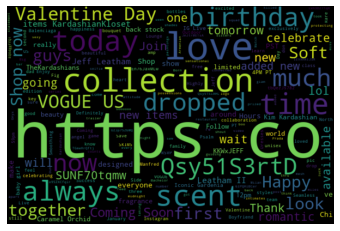

In [16]:
# Visualizing using the WordCloud
all_words = " ".join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 600, height = 400, random_state = 20, max_font_size = 120 ).generate(all_words)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis("off")
plt.show()


In [17]:
# Creating a function that can compute negative, neutral and positive anlysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Sentiment']= df['Polarity'].apply(getAnalysis)

#updated dataframe
df


,Tweets,Subjectivity,Polarity,Sentiment
0,🖤 https://t.co/IEVXhRIJSR,0.000000,0.000000,Neutral
1,Added some new items to my KardashianKloset ht...,0.454545,0.136364,Positive
2,✌🏼 Milan - thank you Prada for the love! Can’t...,0.233333,0.125000,Positive
3,You look so good!,0.600000,0.875000,Positive
4,Just dropped After Hours! Shop now in 13 styl...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Mother Nature 🧜🏻‍♀️ https://t.co/kufiSWM2Dm,0.000000,0.000000,Neutral
96,🎂 ♥️ https://t.co/B5KQ0AvOkF,0.000000,0.000000,Neutral
97,💕 https://t.co/QzJpnLCajW,0.000000,0.000000,Neutral
98,I can’t wait to celebrate with all of the Barb...,0.433333,0.598047,Positive


In [19]:
#Print positive tweets 

j= 1
PositiveDF = df.sort_values(by=['Polarity'])
for i in range(0, PositiveDF.shape[0]):
  if(PositiveDF['Sentiment'][i] == 'Positive'):
    print(str(j) + ')' + PositiveDF['Tweets'][i])
    print()
    j = j+i

1)Added some new items to my KardashianKloset https://t.co/SUNF70tqmw

2)✌🏼 Milan - thank you Prada for the love! Can’t wait to post all my  looks 🌪 Big shout out to my glam squad, u guys killed this look once again!   U always come thru 😝 and always  https://t.co/ixh3DZ71qK

4)  You look so good!

7) Happy Birthday boo! Love you 😘

12)Thank you for always guiding and protecting all of us. Definitely celebrating you today dad. I miss you soooooo much.

18)Good luck to everyone taking the bar tomorrow. I know you’ve got this!

26)I don’t think so lol https://t.co/TGmeHrQftj

36): COMING SOON: AFTER HOURS. Match your midnight attitude in sexy logo mesh intimates designed to make a statement every night of t…

49) Happy birthday 🎈 ♥️♥️♥️

63): Back In Stock: Soft Lounge Dresses. The sensational Soft Lounge dresses you’ve seen all over your feed are back in stock in Onyx…

79): Kim Kardashian counts North’s paintings as some of her most prized possessions in Vogue’s video series, Objects o

In [20]:
#Print Negative tweets 

j= 1
NegativeDF = df.sort_values(by=['Polarity'], ascending= 'False')
for i in range(0, NegativeDF .shape[0]):
  if(NegativeDF ['Sentiment'][i] == 'Negative'):
    print(str(j) + ')' + NegativeDF ['Tweets'][i])
    print()
    j = j+i

1)Duh https://t.co/JmJtrMETsA

10)Anyone that loves the first collection is going to be OBSESSED with the second one https://t.co/JYih8d7O7d

81)long time no sea 🌊 🐚 https://t.co/LtJrwUQ8x7



In [21]:
#Print Neutral tweets 

j= 1
NeutralDF = df.sort_values(by=['Polarity'])
for i in range(0, NeutralDF.shape[0]):
  if(NeutralDF['Sentiment'][i] == 'Neutral'):
    print(str(j) + ')' + NeutralDF['Tweets'][i])
    print()
    j = j+i

1)🖤 https://t.co/IEVXhRIJSR

1)Just dropped  After Hours! Shop now in 13 styles and 5 shades now at https://t.co/Qsy51SlAHL https://t.co/EQ0dggffQ1

5)Birthday selfie with my dad! 
We took this pic on this day celebrating his birthday at the Armenian restaurant in 1998. 
Born on 2.22.44 and today it’s the angel number 2.22.22. I definitely feel the angels all around and feel you all the time. ♾ https://t.co/x95ZXCfqir

12)Who saw The Kardashian’s trailer during The Bachelor????

23)Side-by-side or miles apart sisters are always connected at heart https://t.co/6IPQHlBCer

35)N I T E S W I M 🌒💧🌌 https://t.co/UZJp7SZbMQ

50)Chi &amp; Psalm 💘 https://t.co/iLIH157RtZ

68)💕 https://t.co/BtznKHODoy

88)🖤 https://t.co/7CCbiqahUq

115)Chin up or the crown slips https://t.co/ehUVBveVzT

144)Styled by North https://t.co/DCv1HWbWUK

177)SKIMS in Vogue!!!! https://t.co/4JdsrZRJvX

212)VOGUE US https://t.co/IXDq7UZhzB

249)VOGUE US https://t.co/W307eTZvB8

287)VOGUE US https://t.co/PxwHUz6MRJ

326)V

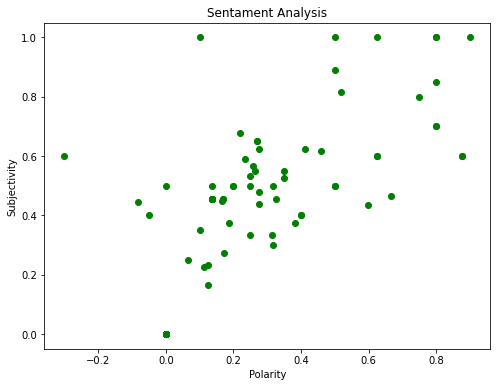

In [22]:
#Plot 

plt.figure(figsize = (8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color= 'green')

plt.title('Sentament Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()